# HW 7

In [9]:
import numpy as np
from matplotlib import pylab as py

## Problem 1

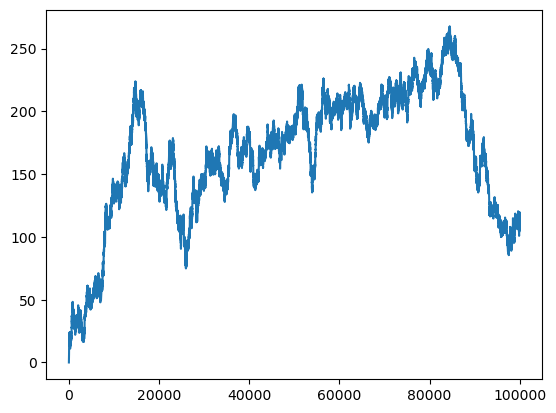

In [33]:
t = 100000
x = np.zeros(t)
y = np.zeros(t)
z = np.zeros(t)
r= np.zeros(t)


for i in range(1,t):
    theta = np.random.uniform(0,np.pi)
    phi = np.random.uniform(0,2*np.pi)
    z[i] = np.cos(theta) + z[i-1]
    x[i] = np.sin(theta)*np.sin(phi) + x[i-1]
    y[i] = np.sin(theta)*np.cos(phi) + y[i-1]
    r[i] = np.sqrt(x[i]**2+y[i]**2+z[i]**2)
v = np.linspace(0,t,t)
py.plot(v,r)
py.show()

Finding the average r^2 over many walks

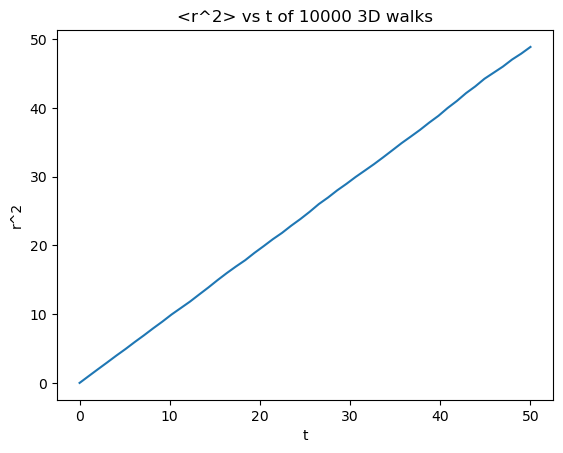

In [5]:
n_trials = 10000
t = 50
r_2 = np.zeros(t)
v = np.linspace(0,t,t)
for k in range(0,n_trials):
    x = np.zeros(t)
    y = np.zeros(t)
    z = np.zeros(t)
    r = np.zeros(t)
    for i in range(1,t):
        theta = np.random.uniform(0,np.pi)
        phi = np.random.uniform(0,2*np.pi)
        z[i] = np.cos(theta) + z[i-1]
        x[i] = np.sin(theta)*np.sin(phi) + x[i-1]
        y[i] = np.sin(theta)*np.cos(phi) + y[i-1]
        r_2[i] += x[i]**2+y[i]**2+z[i]**2

        
r_2 = r_2 * 0.0001  #Divide sum by number of walkers to get average
py.plot(v,r_2)
py.title("<r^2> vs t of 10000 3D walks")
py.xlabel("t")
py.ylabel("r^2")
py.show()

holy moly that looks pretty darn linear to me. looks like A approximately 1.

## problem 2

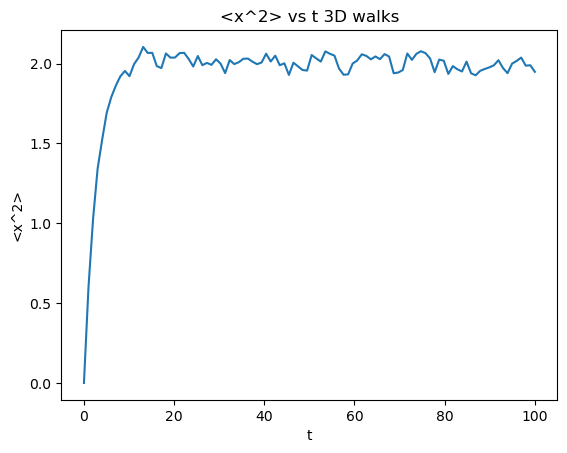

In [29]:
N = int(input("number of Walkers")) #10000 for part b
M = int(input("number of Steps"))    #100 for part b
l = N**-1 #for average
t = np.linspace(0,M,M)
P_forward =  0.40
P_remain_third = (1.0-P_forward)/3.0

x_2 = np.zeros(M)

for i in range(0,N):
    x = np.zeros(M)
    y = np.zeros(M)
    for i in range(1,M):
        c = np.random.uniform(0,1)
        if c <= P_forward:
            x[i] = 1 + x[i-1]
        if c > P_forward and c <= (P_forward+P_remain_third): ###P_back
            x[i] = x[i-1] - 1
        if c> (P_forward +P_remain_third) and c<= (P_forward + 2*P_remain_third):  ###P_up
            y[i] = 1 + y[i-1]
        else:                       ###P_down
            y[i] = y[i-1] - 1
        x_2[i] += x[i]**2
x_2_avg = x_2 * l
py.plot(t,x_2_avg)
py.title("<x^2> vs t 3D walks")
py.xlabel("t")
py.ylabel("<x^2>")
py.show()

To find these I used the same program as above with parts marked "for part b" as the variable value.

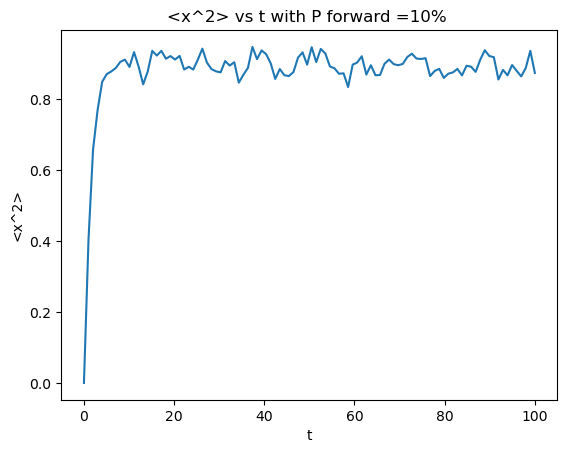

In [19]:
py.plot(t,x_2_avg)
py.title("<x^2> vs t with P forward =10% ")
py.xlabel("t")
py.ylabel("<x^2>")
py.show()

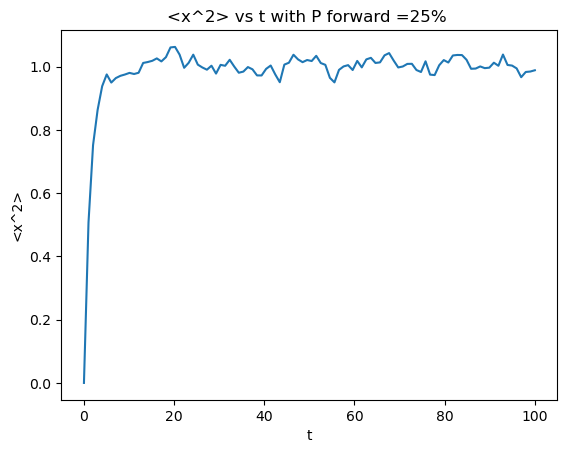

In [22]:
py.plot(t,x_2_avg)
py.title("<x^2> vs t with P forward =25% ")
py.xlabel("t")
py.ylabel("<x^2>")
py.show()

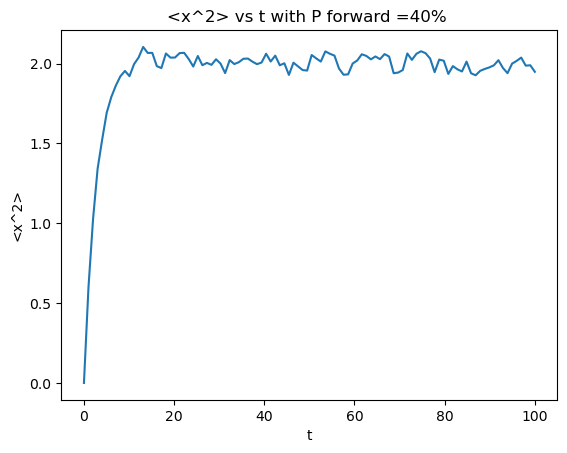

In [30]:
py.plot(t,x_2_avg)
py.title("<x^2> vs t with P forward =40% ")
py.xlabel("t")
py.ylabel("<x^2>")
py.show()

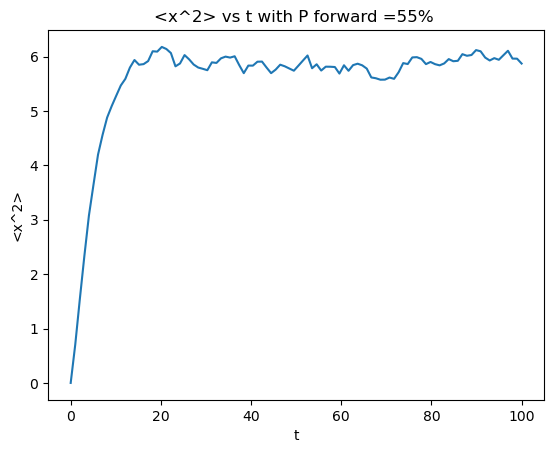

In [26]:
py.plot(t,x_2_avg)
py.title("<x^2> vs t with P forward =55% ")
py.xlabel("t")
py.ylabel("<x^2>")
py.show()

As the probability that the walker goes forward increases, The average distance they go increases too. This seems to only go up to a point before leveling off. The amount of time that it takes to reach this "level" increases as P_forward increases. This may be a quadratic relationship between <x^2> and P_forward?

## problem 3
Use monte carlo integration to find the average of $v^2$ over the probability
$$ P(v) = \frac{A}{\sqrt{1+av^2}}e^{-(v-10)^2/100} $$

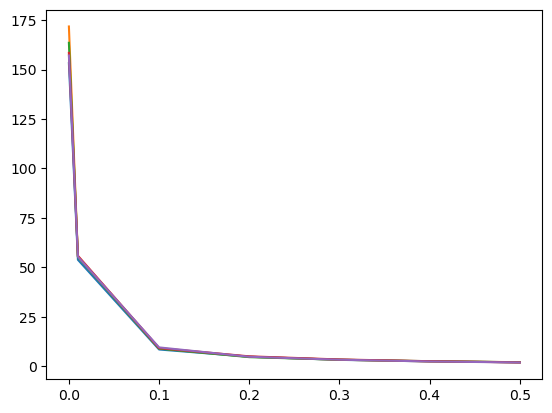

In [38]:
def fk(v,a):
    return (np.exp(-0.01*(v-10)**2) * np.sqrt(1+a*v**2))
def fk2(v,a):
    return v**2 * np.exp(-0.01*(v-10)**2) * np.sqrt(1+a*v**2) **-1

N = 10000000; b = 0; c = 100000
N_inv = N**-1
a = [0.0, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
#Int = []
for L in range(0,5):
    Int = []
    for i in a:
        Ik_inv = np.sum(fk(np.random.uniform(b,c,N),i)) **-1
        Ik2 = np.sum(fk2(np.random.uniform(b,c,N),i))
        Int.append(Ik_inv * Ik2) ### since both intergals are divided by N, and multiplied by (c-b), these terms cancel out and dissapear
    py.plot(a,Int)
py.show()

This one took some time to run, 94 seconds over 4 runs with N = 1e7, c = 1e5. And there is still a good amount of deviation in the a = 0.0 mark. 

## Exercise 10.8

From the slides we know that when we come up against an intergral which goes to infinity over the range we are intgrating, we can split up the integral such that
$$\int_{a}^{b}f(x)dx = \int_{a}^{b}g(x)w(x)dx$$
where w(x) is the part of the function which goes to infinity within the bounds of the integral
$p(x)$ is defined as $\frac{w(x)}{A}$ where $A = \int_{a}^{b}w(x)dx$ \
So for our problem \
$$\int_{0}^{1}\frac{x^{-1/2}}{e^x +1}dx \quad \rightarrow \quad A = \int_{0}^{1}e^{-1/2}dx = [2\sqrt{x}_0]^2 \quad \rightarrow \quad p(x)= \frac{1}{2\sqrt{x}} \quad \rightarrow \quad 2\int_{0}^{1}\frac{p(x)}{e^x +1}dx$$
According to slides the probability distrobution is
$\sqrt{x}$ so $r^2 = x$
$$\frac{2}{N}\sum_{0}^{N}\frac{1}{e^{r^2} +1}dr $$

In [64]:
g = lambda x: (np.exp(x)+1)**-1
I = lambda N: 2 * np.sum(g(np.random.uniform(0,1,N)**2)) / N
print(I(1000000))

0.8388945979535017


## Exercise 10.12
a) the range of $\theta$ is $0 \rightarrow \pi$ and $\phi$ is $0 \rightarrow 2\pi$. So with $p(\theta) = \frac{sin(\theta)}{2}$ and $p(\phi) = \frac{1}{2\pi}$\
$\frac{1}{2}\int_0^\pi\sin(\theta)d\theta = \frac{1}{2}[\sin(\theta)]_0^\pi = 1 \qquad and \qquad \frac{1}{2\pi}\int_0^{2\pi}1d\phi = \frac{1}{2\pi}[\phi]_0^{2\pi} = 1$

b) since $\phi$ runs inbetween $0$ and $2\pi$, it is pretty easy to see that the probability that $\phi^\prime$ lies inbetween $0$ and $\phi$ is$r = \frac{\phi}{2\pi}$ so $2\pi r = \phi$\
$\theta$ on thee other hand is mildly annoying, we have the probability that $\theta^\prime$ lies inbetween $0$ and $\theta$ is\
$$ \int_0^\theta \frac{\sin(\theta^\prime)}{2}d\theta^\prime = [\frac{-\cos(\theta^\prime)}{2}]_0^2 = \frac{1}{2} - \frac{\cos(\theta)}{2}$$
So with $r$ as our random number $\theta = \arccos(\frac{1}{2}-r)$

In [15]:
pip install vpython


     ---------------------------------------- 0.0/50.3 kB ? eta -:--:--
     ------------------------------ ------- 41.0/50.3 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 50.3/50.3 kB 646.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   -- ------------------------------------- 0.2/3.6 MB 4.1 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/3.6 MB 5.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.9/3.6 MB 7.5 MB/s eta 0:00:01
   -------------- ------------------------- 1.3/3.6 MB 7.7 MB/s eta 0:00:01
   -------------------- ------------------- 1.8/3.6 MB 8.1 MB/s eta 0:00:01
   ------------------------ --------------- 2.2/3.6 MB 8.3 MB/s eta 0:00:01
   ------------------------------ --------- 2.7/3.6 MB 8.6 MB/s eta 0:00:01
   ----------------------------------- ---- 3.1/3.6 MB 8.7 MB/s 

In [16]:
from vpython import sphere

<IPython.core.display.Javascript object>

In [25]:
N = 500
phi = np.zeros(N)
theta = np.zeros(N)

for i in range(N):
    phi[i] = np.random.uniform(0,2*np.pi)
    theta[i] = np.arccos(0.5 - np.random.uniform(0,1))

z = np.cos(theta)
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
for i in range(N):
    sphere((pos = x[i],y[i],z[i]), radius = 0.2)


Exception ignored in: <function standardAttributes.__del__ at 0x00000213032BED40>
Traceback (most recent call last):
  File "C:\Users\theda\anaconda3\Lib\site-packages\vpython\vpython.py", line 1176, in __del__
    super(standardAttributes, self).__del__()
  File "C:\Users\theda\anaconda3\Lib\site-packages\vpython\vpython.py", line 348, in __del__
    cmd = {"cmd": "delete", "idx": self.idx}
                                   ^^^^^^^^
AttributeError: 'sphere' object has no attribute 'idx'


TypeError: sphere.__init__() takes 1 positional argument but 2 were given

While I do believe that there is no malicious actors using vpython to mess with people, I got a message from windows telling my anaconda wanted through the firewall. I believe that this will get me the correct answer if I did install it correctly. Currently I am not comfortable getting vpyhton onto my computer.